In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet
from pandas_profiling import ProfileReport

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data4= pd.read_csv('Chicago_Crimes_2012_to_2017.csv')
data3= pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False)
data2= pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)



In [7]:
data4.shape

(1456714, 23)

In [8]:
data3.shape


(2688710, 23)

In [9]:
data2.shape

(1872343, 23)

In [5]:
# concat all the dataframes into one 
df = pd.concat([data4,data3,data2])

In [10]:
df.shape


(6017767, 23)

In [11]:
df.head()

Unnamed: 0        ID Case Number                    Date  \
0           3  10508693    HZ250496  05/03/2016 11:40:00 PM   
1          89  10508695    HZ250409  05/03/2016 09:40:00 PM   
2         197  10508697    HZ250503  05/03/2016 11:31:00 PM   
3         673  10508698    HZ250424  05/03/2016 10:10:00 PM   
4         911  10508699    HZ250455  05/03/2016 10:00:00 PM   

                 Block  IUCR            Primary Type              Description  \
0   013XX S SAWYER AVE  0486                 BATTERY  DOMESTIC BATTERY SIMPLE   
1   061XX S DREXEL AVE  0486                 BATTERY  DOMESTIC BATTERY SIMPLE   
2  053XX W CHICAGO AVE  0470  PUBLIC PEACE VIOLATION         RECKLESS CONDUCT   
3    049XX W FULTON ST  0460                 BATTERY                   SIMPLE   
4    003XX N LOTUS AVE  0820                   THEFT           $500 AND UNDER   

  Location Description  Arrest  ...  Ward  Community Area  FBI Code  \
0            APARTMENT    True  ...  24.0            29.0       08B   
1            RESIDENCE   False  ...  20.0            42.0       08B   
2               STREET   False  ...  37.0            25.0        24   
3             SIDEWALK   False  ...  28.0            25.0       08B   
4            RESIDENCE   False  ...  28.0            25.0        06   

   X Coordinate  Y Coordinate  Year              Updated On   Latitude  \
0     1154907.0     1893681.0  2016  05/10/2016 03:56:50 PM  41.864073   
1     1183066.0     1864330.0  2016  05/10/2016 03:56:50 PM  41.782922   
2     1140789.0     1904819.0  2016  05/10/2016 03:56:50 PM  41.894908   
3     1143223.0     1901475.0  2016  05/10/2016 03:56:50 PM  41.885687   
4     1139890.0     1901675.0  2016  05/10/2016 03:56:50 PM  41.886297   

   Longitude                       Location  
0 -87.706819  (41.864073157, -87.706818608)  
1 -87.604363   (41.782921527, -87.60436317)  
2 -87.758372  (41.894908283, -87.758371958)  
3 -87.749516  (41.885686845, -87.749515983)  
4 -87.761751  (41.886297242, -87.761750709)  

[5 rows x 23 columns]

In [12]:
df.tail(20)

Unnamed: 0       ID Case Number                    Date  \
1872323     6254248  4673599    HM275064  04/05/2006 11:00:00 AM   
1872324     6254249  4673600    HM262987  03/31/2006 04:45:00 AM   
1872325     6254250  4673601    HM273851  04/05/2006 05:10:00 PM   
1872326     6254251  4673602    HM274832  04/05/2006 11:00:00 PM   
1872327     6254252  4673603    HM273926  04/05/2006 05:55:00 PM   
1872328     6254253  4673604    HM274869  04/05/2006 11:00:00 PM   
1872329     6254254  4673605    HM267808  04/02/2006 05:30:00 PM   
1872330     6254255  4673606    HM202185  02/26/2006 01:09:45 PM   
1872331     6254256  4673609    HM186474  02/17/2006 03:29:53 PM   
1872332     6254257  4673610    HM120260  01/12/2006 01:35:48 PM   
1872333     6254258  4673611    HM275012  04/05/2006 03:00:00 PM   
1872334     6254259  4673612    HM273417  04/05/2006 02:15:00 PM   
1872335     6254260  4673613    HM268862  04/01/2006 05:15:00 PM   
1872336     6254261  4673615    HM263130  03/31/2006 07:40:00 AM   
1872337     6254262  4673619    HM273423  04/05/2006 01:48:00 PM   
1872338     6254263  4673620    HM269120  04/04/2006 10:00:00 AM   
1872339     6254264  4673621    HM272803  04/04/2006 05:30:00 PM   
1872340     6254265  4673622    HM271989  04/04/2006 06:40:30 PM   
1872341     6254266  4673623    HM271676  04/04/2006 03:50:00 PM   
1872342     6254267  4673624    HM275036  04/05/2006 10:30:00 PM   

                             Block  IUCR     Primary Type  \
1872323         062XX S HAMLIN AVE  0890            THEFT   
1872324       071XX S CARPENTER ST  0486          BATTERY   
1872325         044XX N MENARD AVE  0486          BATTERY   
1872326          091XX S LAFLIN ST  0810            THEFT   
1872327        064XX S KENWOOD AVE  0610         BURGLARY   
1872328           025XX W HURON ST  0810            THEFT   
1872329         032XX W MADISON ST  0460          BATTERY   
1872330        132XX S LANGLEY AVE  1811        NARCOTICS   
1872331            064XX S WOOD ST  1811        NARCOTICS   
1872332            0000X W 95TH ST  1305  CRIMINAL DAMAGE   
1872333         021XX W CUYLER AVE  1310  CRIMINAL DAMAGE   
1872334        042XX W MAYPOLE AVE  0486          BATTERY   
1872335        007XX S KILDARE AVE  0460          BATTERY   
1872336            014XX W 57TH ST  1310  CRIMINAL DAMAGE   
1872337       047XX S KOMENSKY AVE  051A          ASSAULT   
1872338         002XX N KOLMAR AVE  0460          BATTERY   
1872339          034XX N MAJOR AVE  1340  CRIMINAL DAMAGE   
1872340          081XX S ELLIS AVE  0430          BATTERY   
1872341  057XX S COTTAGE GROVE AVE  0460          BATTERY   
1872342        040XX N RICHMOND ST  0810            THEFT   

                           Description           Location Description  Arrest  \
1872323                  FROM BUILDING       SCHOOL, PUBLIC, BUILDING   False   
1872324        DOMESTIC BATTERY SIMPLE                         STREET   False   
1872325        DOMESTIC BATTERY SIMPLE                      RESIDENCE    True   
1872326                      OVER $500                         STREET   False   
1872327                 FORCIBLE ENTRY                      APARTMENT   False   
1872328                      OVER $500                         STREET   False   
1872329                         SIMPLE                       SIDEWALK   False   
1872330   POSS: CANNABIS 30GMS OR LESS                         STREET    True   
1872331   POSS: CANNABIS 30GMS OR LESS               RESIDENCE-GARAGE    True   
1872332            CRIMINAL DEFACEMENT                      CTA TRAIN   False   
1872333                    TO PROPERTY               RESIDENCE-GARAGE   False   
1872334        DOMESTIC BATTERY SIMPLE                         STREET   False   
1872335                         SIMPLE       SCHOOL, PUBLIC, BUILDING   False   
1872336                    TO PROPERTY                      RESIDENCE   False   
1872337            AGGRAVATED: HANDGUN                          ALLEY    True   
18

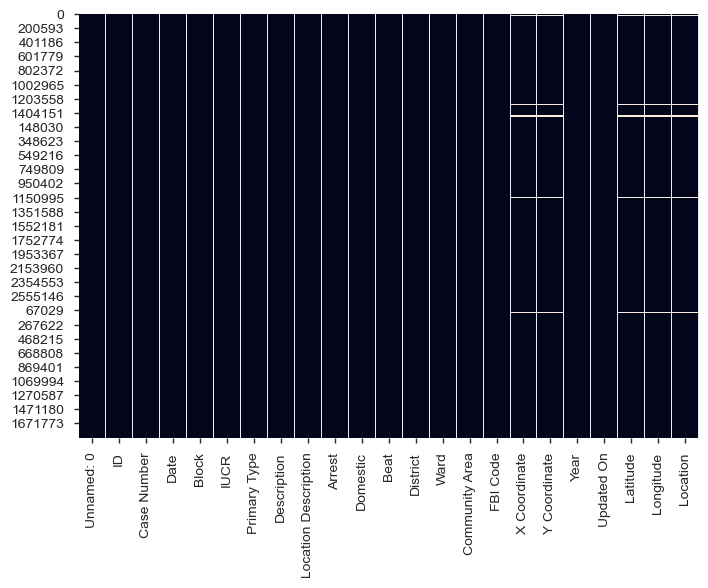

In [15]:
plt.plot(figsize=(10,10))
sns.heatmap(df.isnull(),cbar= False)

In [29]:
df1 = df.drop(['Unnamed: 0','ID','Case Number','Location','Community Area','Updated On','Beat','Year','IUCR','District','Ward','FBI Code', 'X Coordinate', 'Y Coordinate','Latitude','Longitude'],axis=1)

In [30]:
df1.shape

(6017767, 7)

In [31]:
df1.head()

Date                Block            Primary Type  \
0  05/03/2016 11:40:00 PM   013XX S SAWYER AVE                 BATTERY   
1  05/03/2016 09:40:00 PM   061XX S DREXEL AVE                 BATTERY   
2  05/03/2016 11:31:00 PM  053XX W CHICAGO AVE  PUBLIC PEACE VIOLATION   
3  05/03/2016 10:10:00 PM    049XX W FULTON ST                 BATTERY   
4  05/03/2016 10:00:00 PM    003XX N LOTUS AVE                   THEFT   

               Description Location Description  Arrest  Domestic  
0  DOMESTIC BATTERY SIMPLE            APARTMENT    True      True  
1  DOMESTIC BATTERY SIMPLE            RESIDENCE   False      True  
2         RECKLESS CONDUCT               STREET   False     False  
3                   SIMPLE             SIDEWALK   False     False  
4           $500 AND UNDER            RESIDENCE   False      True

In [35]:
df1.Date = pd.to_datetime(df.Date, format = '%m/%d/%Y %I:%M:%S %p')


In [36]:
df1.Date

0         2016-05-03 23:40:00
1         2016-05-03 21:40:00
2         2016-05-03 23:31:00
3         2016-05-03 22:10:00
4         2016-05-03 22:00:00
                  ...        
1872338   2006-04-04 10:00:00
1872339   2006-04-04 17:30:00
1872340   2006-04-04 18:40:30
1872341   2006-04-04 15:50:00
1872342   2006-04-05 22:30:00
Name: Date, Length: 6017767, dtype: datetime64[ns]

In [58]:
# setting up the date as index of data
df1.index = pd.DatetimeIndex(df1.Date)

In [59]:
df1.head()

Date                Block  \
Date                                                           
2016-05-03 23:40:00 2016-05-03 23:40:00   013XX S SAWYER AVE   
2016-05-03 21:40:00 2016-05-03 21:40:00   061XX S DREXEL AVE   
2016-05-03 23:31:00 2016-05-03 23:31:00  053XX W CHICAGO AVE   
2016-05-03 22:10:00 2016-05-03 22:10:00    049XX W FULTON ST   
2016-05-03 22:00:00 2016-05-03 22:00:00    003XX N LOTUS AVE   

                               Primary Type              Description  \
Date                                                                   
2016-05-03 23:40:00                 BATTERY  DOMESTIC BATTERY SIMPLE   
2016-05-03 21:40:00                 BATTERY  DOMESTIC BATTERY SIMPLE   
2016-05-03 23:31:00  PUBLIC PEACE VIOLATION         RECKLESS CONDUCT   
2016-05-03 22:10:00                 BATTERY                   SIMPLE   
2016-05-03 22:00:00                   THEFT           $500 AND UNDER   

                    Location Description  Arrest  Domestic  
Date                                                        
2016-05-03 23:40:00            APARTMENT    True      True  
2016-05-03 21:40:00            RESIDENCE   False      True  
2016-05-03 23:31:00               STREET   False     False  
2016-05-03 22:10:00             SIDEWALK   False     False  
2016-05-03 22:00:00            RESIDENCE   False      True

In [47]:
crime_type = df1['Primary Type'].value_counts().iloc[:20].index

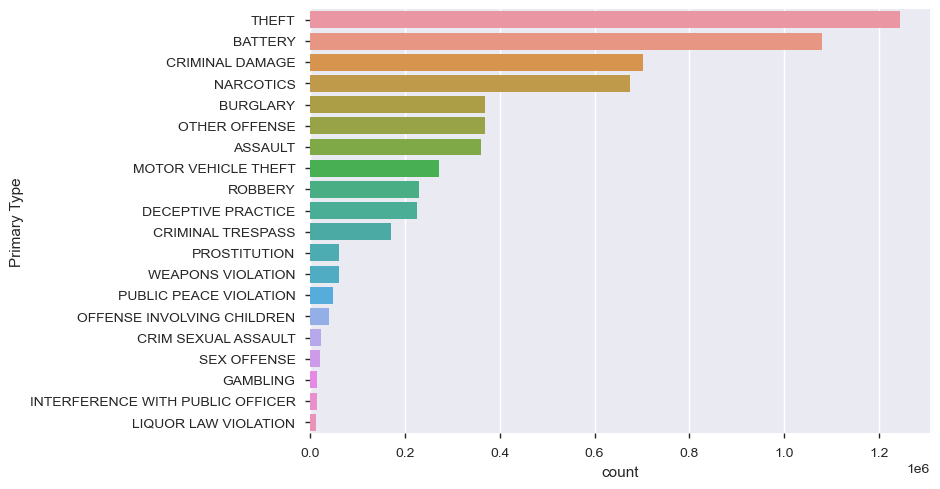

In [48]:
plt.plot(figsize= (10,10))
sns.countplot(y = df1['Primary Type'],order=crime_type,)

In [54]:
location = df1['Location Description'].value_counts().iloc[:20].index

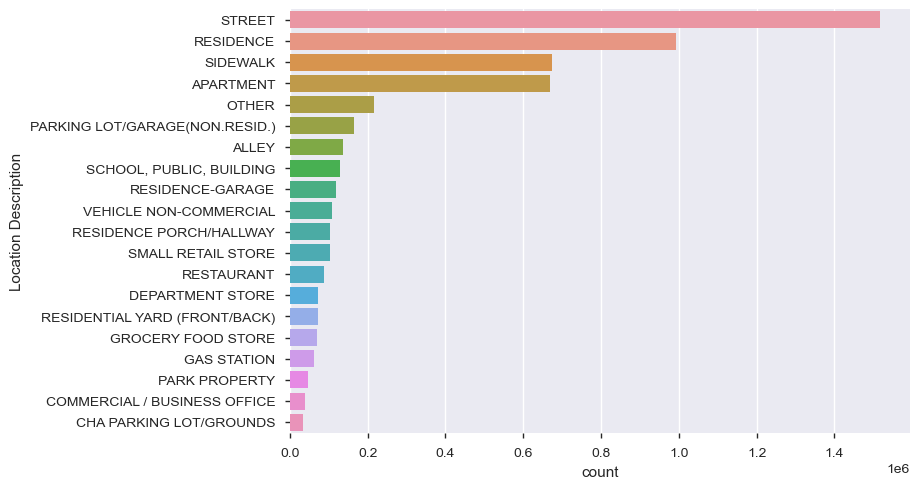

In [55]:
plt.plot(figsize=(10,10))
sns.countplot(y= df['Location Description'],order = location )

In [66]:
##counting how many crime are comitted yearwise from year 2005 to 2017 in chicago
df1.resample('Y').size()

Date
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Numbers Of crimes')

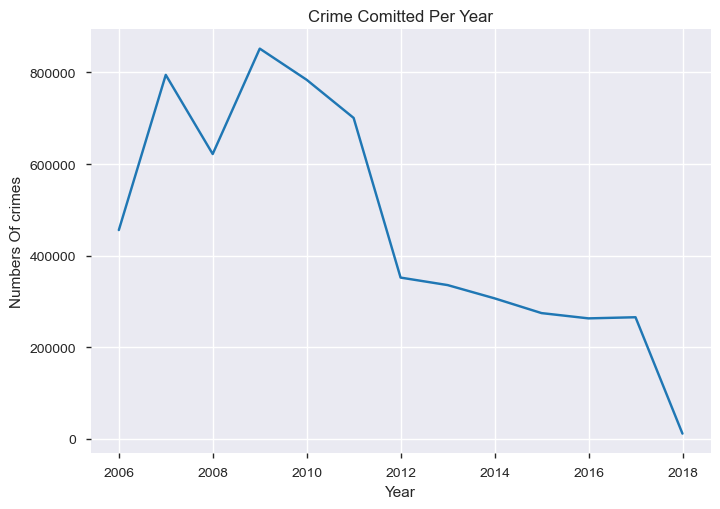

In [81]:
plt.plot(df1.resample('Y').size())
plt.title('Crime Comitted Per Year')
plt.xlabel('Year')
plt.ylabel('Numbers Of crimes')


In [82]:
# fron above cahrt we can say that the crime rates are decreasing from 2006 to 2018###

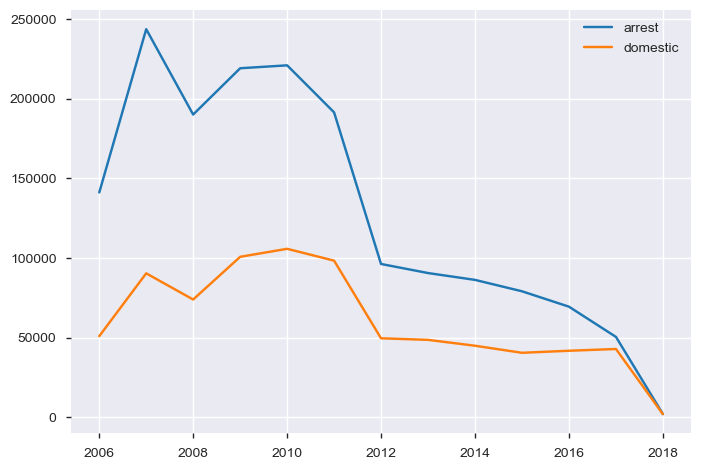

In [90]:
### arrest and domestic yearlyl basis
plt.plot(df1.resample('Y').sum(),)
plt.legend(['arrest','domestic'])

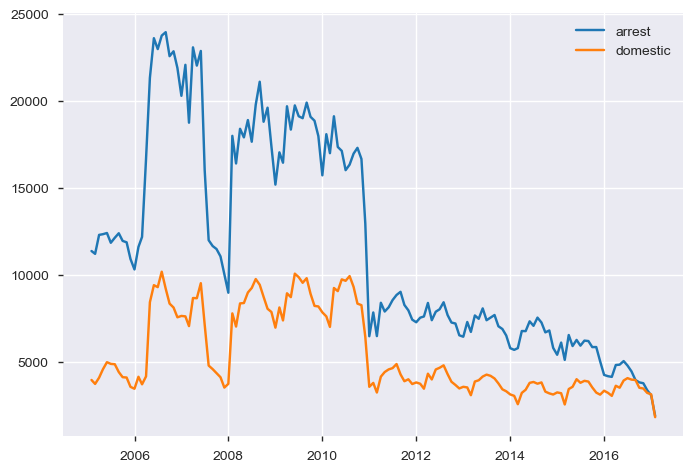

In [91]:
### arrest and domestic yearlyl basis
plt.plot(df1.resample('m').sum(),)
plt.legend(['arrest','domestic'])

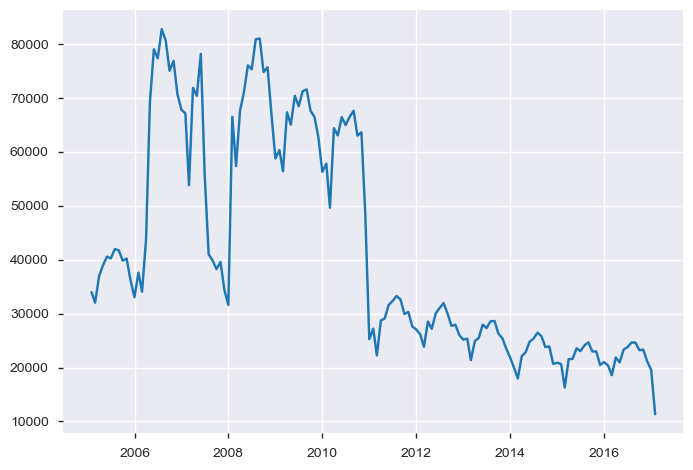

In [93]:
### arrest and domestic yearlyl basis
plt.plot(df1.resample('M').size(),)


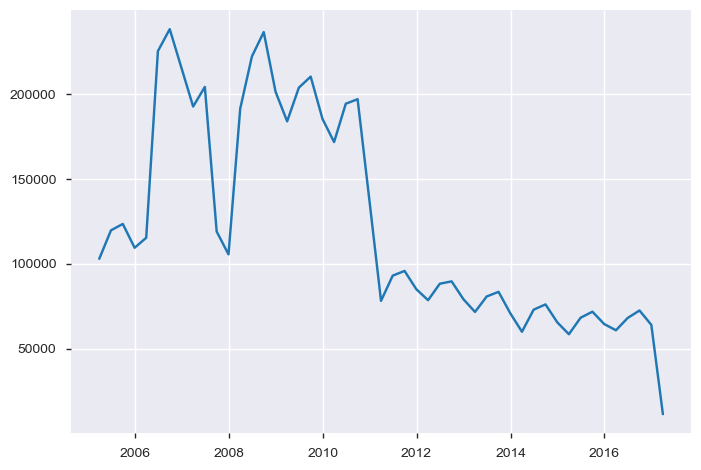

In [97]:
#crime rate in quarterly basis
plt.plot(df1.resample('Q').size(),)

In [98]:
df2 = df1.resample('m').size().reset_index()

In [99]:
df2.head()

Date      0
0 2005-01-31  33983
1 2005-02-28  32042
2 2005-03-31  36970
3 2005-04-30  38963
4 2005-05-31  40572

In [100]:
df2.columns = ['ds','y']

In [105]:
####### applying fbprophet
m = Prophet()
m.fit(df2)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [124]:
future = m.make_future_dataframe(365)

In [125]:
prediction = m.predict(future)

In [126]:
prediction

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0   2005-01-31  60454.773642  38111.275787  73569.156772  60454.773642   
1   2005-02-28  60322.370911  34745.628302  68051.524310  60322.370911   
2   2005-03-31  60175.782173  41413.513945  76398.331151  60175.782173   
3   2005-04-30  60033.922104  44216.688440  76506.412659  60033.922104   
4   2005-05-31  59887.333366  47720.511944  82408.371213  59887.333366   
..         ...           ...           ...           ...           ...   
505 2018-01-27  10104.146683 -10106.215609  22308.303534   9969.559376   
506 2018-01-28  10091.080010 -11757.428419  22506.732011   9956.145153   
507 2018-01-29  10078.013336 -10125.813440  20551.775035   9942.730931   
508 2018-01-30  10064.946663 -10388.275924  21906.166789   9929.251378   
509 2018-01-31  10051.879989 -11627.608308  21814.686153   9915.465992   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0    60454.773642    -4762.404217          -4762.404217          -4762.404217   
1    60322.370911    -9500.516358          -9500.516358          -9500.516358   
2    60175.782173    -1224.151952          -1224.151952          -1224.151952   
3    60033.922104     1182.829000           1182.829000           1182.829000   
4    59887.333366     5498.247964           5498.247964           5498.247964   
..            ...             ...                   ...                   ...   
505  10244.092096    -4977.920771          -4977.920771          -4977.920771   
506  10231.522572    -4922.571939          -4922.571939          -4922.571939   
507  10218.953047    -4867.895035          -4867.895035          -4867.895035   
508  10206.381104    -4816.721706          -4816.721706          -4816.721706   
509  10193.809217    -4772.140541          -4772.140541          -4772.140541   

          yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0   -4762.404217  -4762.404217  -4762.404217                   0.0   
1   -9500.516358  -9500.516358  -9500.516358                   0.0   
2   -1224.151952  -1224.151952  -1224.151952                   0.0   
3    1182.829000   1182.829000   1182.829000                   0.0   
4    5498.247964   5498.247964   5498.247964                   0.0   
..           ...           ...           ...                   ...   
505 -4977.920771  -4977.920771  -4977.920771                   0.0   
506 -4922.571939  -4922.571939  -4922.571939                   0.0   
507 -4867.895035  -4867.895035  -4867.895035                   0.0   
508 -4816.721706  -4816.721706  -4816.721706                   0.0   
509 -4772.140541  -4772.140541  -4772.140541                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                           0.0                         0.0  55692.369426  
1                           0.0                         0.0  50821.854553  
2                           0.0                         0.0  58951.630221  
3                           0.0                         0.0  61216.751104  
4                           0.0                         0.0  65385.581330  
..                          ...                         ...           ...  
505                         0.0                         0.0   5126.225912  
506                         0.0                         0.0   5168.508071  
507                         0.0                         0.0   5210.118301  
508                         0.0                         0.0   5248.224956  
509                         0.0                         0.0   5279.739449  

[510 rows x 16 columns]

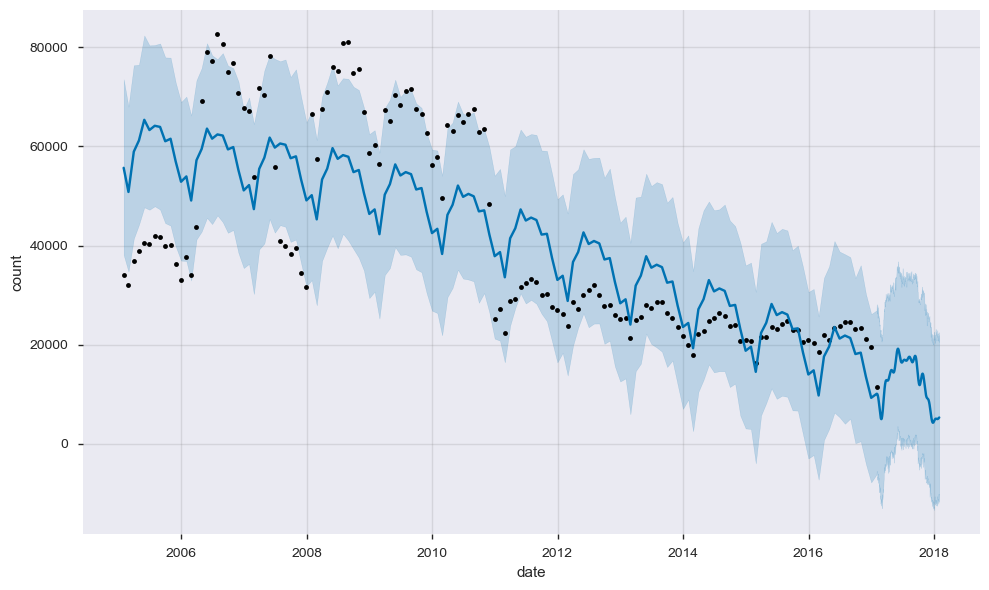

In [127]:
figure = m.plot(prediction, xlabel='date',ylabel='count')

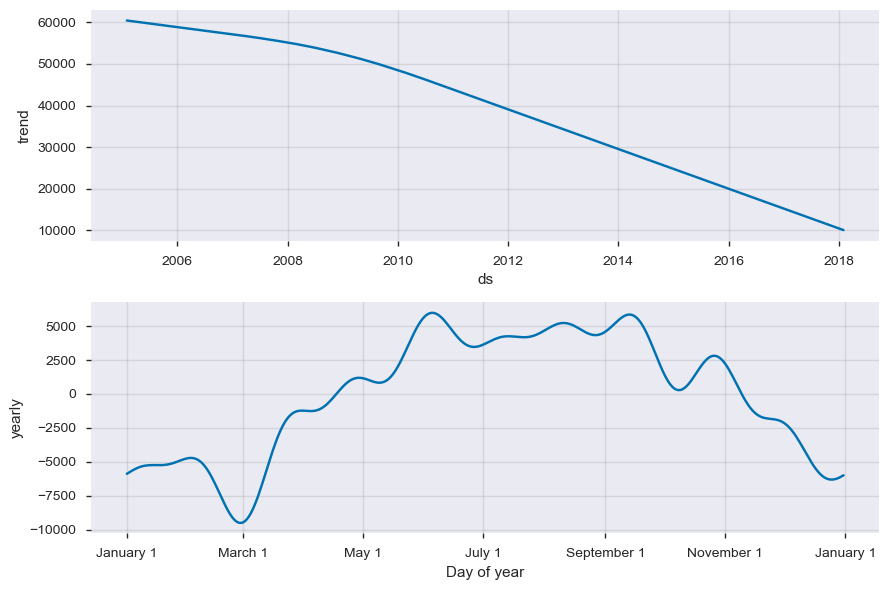

In [128]:
figure = m.plot_components(prediction)

In [131]:
# import plotly for interactive output
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, prediction)

In [133]:
plot_components_plotly(m, prediction)